In [14]:
## Self-Organizing Maps by Paras Chopra
## www.paraschopra.com

import numpy as np
from random import *
from math import *

class Node:

    def __init__(self, FV_size=10, PV_size=10, Y=0, X=0):
        self.FV_size=FV_size
        self.PV_size=PV_size
        self.FV = [0.0]*FV_size # Feature Vector
        self.PV = [0.0]*PV_size # Prediction Vector
        self.X=X # X location
        self.Y=Y # Y location
        
        for i in range(FV_size):
            self.FV[i]=random() # Assign a random number from 0 to 1
            
        for i in range(PV_size):
            self.PV[i]=random() # Assign a random number from 0 to 1


class SOM:

    #Let radius=False if you want to autocalculate the radis
    def __init__(self, height=10, width=10, FV_size=10, PV_size=10, radius=False, learning_rate=0.005):
        self.height=height
        self.width=width
        self.radius=radius if radius else (height+width)/2
        self.total=height*width
        self.learning_rate=learning_rate
        self.nodes=[0]*(self.total)
        self.FV_size=FV_size
        self.PV_size=PV_size
        for i in range(self.height):
            for j in range(self.width):
                self.nodes[(i)*(self.width)+j]=Node(FV_size, PV_size,i,j)

    # Train_vector format: [ [FV[0], PV[0]],
    #                        [FV[1], PV[1]], so on..
    
    def train(self, iterations=1000, train_vector=[[[0.0],[0.0]]]):
        time_constant=iterations/log(self.radius)
        radius_decaying=0.0
        learning_rate_decaying=0.0
        influence=0.0
        stack=[] #Stack for storing best matching unit's index and updated FV and PV
        temp_FV=[0.0]*self.FV_size
        temp_PV=[0.0]*self.PV_size
        for i in range(1,iterations+1):
            radius_decaying=self.radius*exp(-1.0*i/time_constant)
            learning_rate_decaying=self.learning_rate*exp(-1.0*i/time_constant)
            
            #Stop the training if the learning rate decaying is very low
            if learning_rate_decaying < 0.001:
              print("")
              print("Learning rate too low to keep")
              break

            print (i, end=', ')
            if i%50==0:
              print("")

            for  j in range(len(train_vector)):
                input_FV=train_vector[j][0]
                input_PV=train_vector[j][1]
                best=self.best_match(input_FV)
                stack=[]
                for k in range(self.total):
                    dist=self.distance(self.nodes[best],self.nodes[k])
                    if dist < radius_decaying:
                        temp_FV=[0.0]*self.FV_size
                        temp_PV=[0.0]*self.PV_size
                        influence=exp((-1.0*(dist**2))/(2*radius_decaying*i))

                        for l in range(self.FV_size):
                            #Learning
                            temp_FV[l]=self.nodes[k].FV[l]+influence*learning_rate_decaying*(input_FV[l]-self.nodes[k].FV[l])

                        for l in range(self.PV_size):
                            #Learning
                            temp_PV[l]=self.nodes[k].PV[l]+influence*learning_rate_decaying*(input_PV[l]-self.nodes[k].PV[l])

                        #Push the unit onto stack to update in next interval
                        stack[0:0]=[[[k],temp_FV,temp_PV]]

                #Update nodes
                for l in range(len(stack)):
                    
                    self.nodes[stack[l][0][0]].FV[:]=stack[l][1][:]
                    self.nodes[stack[l][0][0]].PV[:]=stack[l][2][:]

                
    #Returns prediction vector
    def predict(self, FV=[0.0],get_ij=False):
        best=self.best_match(FV)
        if get_ij:
          return self.nodes[best].PV,self.nodes[best].X,self.nodes[best].Y
        return self.nodes[best].PV
        
    #Returns best matching unit's index
    def best_match(self, target_FV=[0.0]):

        #minimum=sqrt(self.FV_size) #Minimum distance
        minimum = np.inf #an "infinite" value
        minimum_index=1 #Minimum distance unit
        temp=0.0
        for i in range(self.total):
            temp=0.0
            temp=self.FV_distance(self.nodes[i].FV,target_FV)
            if temp<minimum:
                minimum=temp
                minimum_index=i
        
        return minimum_index

    def FV_distance(self, FV_1=[0.0], FV_2=[0.0]):
        temp=0.0
        for j in range(self.FV_size):
                temp=temp+(FV_1[j]-FV_2[j])**2

        temp=sqrt(temp)
        return temp

    def distance(self, node1, node2):
        return sqrt((node1.X-node2.X)**2+(node1.Y-node2.Y)**2)

In [15]:
featureVsize = 16 #16 indicators per country
mymap=SOM(20,20,featureVsize,1,False,0.05)

import csv
with open('energy.csv') as csvfile:
    energy = list(csv.DictReader(csvfile))

conjunto_entrenamiento=[]
countries = []
n_country=0

for country in energy:
  countries.append(country["Country Name"])
  muestra = []
  column = 0
  for x in country.values():
    if(column < 3):
      column += 1
      continue
    muestra.append(float(x))
  conjunto_entrenamiento.append([muestra, [n_country]])
  n_country += 1

mymap.train(800,conjunto_entrenamiento)
print("Training finished!")

1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 
51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 
101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 
151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 
201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

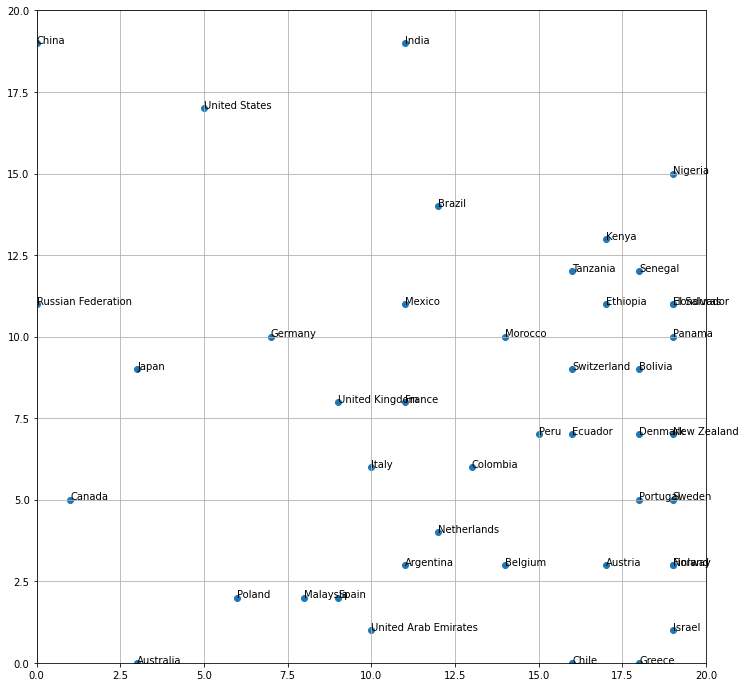

In [16]:
#Graficar cada país en su BMU

import csv
import matplotlib.pyplot as plt

som_res = open('som_res.csv', 'w')
writer = csv.writer(som_res)

n_country=0
xs = []
ys = []
for country in energy:
  muestra = []
  column = 0
  for x in country.values():
    if(column < 3):
      column += 1
      continue
    muestra.append(float(x))
  row = mymap.predict(muestra, True)[1:]
  xs.append(row[0])
  ys.append(row[1])
  writer.writerow(row)
  #print(row)
  n_country += 1

som_res.close()

fig, ax = plt.subplots()
ax.scatter(xs, ys)

for i, txt in enumerate(countries):
    ax.annotate(txt, (xs[i], ys[i]))

ax.grid(True)
ax.set_xlim(0, 20)
ax.set_ylim(0, 20)
fig.set_size_inches(12, 12)